<a href="https://colab.research.google.com/github/umanguss/data_science_py/blob/main/us_py_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries and load the dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:

data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')
data.head(2)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


### 1. Check if there is any missing value.
[Sklearn scaling functions will throw an error for the data with missing values]

In [10]:
# prompt:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
#
# ### Import the Libraries and load the dataset
warnings.filterwarnings("ignore")
#Hope all the participants are treated the missing values in the HR_data used in the last inclass.
#The imputed version of the data have to be used for this exercise.
hrdata=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')
data.head(2)
# ### 1. Check if there is any missing value.
# [Sklearn scaling functions will throw an error for the data with missing values]
print(hrdata.isnull().sum())


Age                  0
Workclass         2079
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        2087
Relationship         0
Race                 0
Gender               0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            656
Target               0
dtype: int64


### 2. Keep only the Numeric values in one variable
[Scaling can be performed only on Numeric data]

In [17]:
# prompt:

numeric_data = hrdata.select_dtypes(include=np.number)
print(numeric_data)

       Age  fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
36522   39  215419             13             0             0              36
36523   64  321403              9             0             0              40
36524   38  374983             13             0             0              50
36525   44   83891             13          5455             0              40
36526   35  182148             13             0             0              60

[36527 rows x 6 columns]


### 3. Compute the Range and comment about the need of scaling for this dataset

In [13]:
# prompt:

# Compute the Range
range_data = numeric_data.max(axis=0) - numeric_data.min(axis=0)

# Print the Range
print(range_data)

# Comment about the need of scaling for this dataset
print("The range of values for each feature varies significantly, indicating that scaling may be necessary to ensure that features with larger ranges do not dominate the model training process.")


Age                    73
fnlwgt            1472420
Education_Num          15
Capital_Gain        99999
Capital_Loss         4356
Hours_per_week         98
dtype: int64
The range of values for each feature varies significantly, indicating that scaling may be necessary to ensure that features with larger ranges do not dominate the model training process.


### 4.  Perform standard scaling on the 'Area' column without using sklearn function

## x' = (x- MEAN ) / STD

In [19]:
# prompt:

# Calculate the mean and standard deviation of the 'Area' column
mean = numeric_data['Age'].mean()
std = numeric_data['Age'].std()

# Standardize the 'Area' column
scaled_area = (numeric_data['Age'] - mean) / std

# Print the scaled 'Area' column
print(scaled_area)


0        0.029050
1        0.834352
2       -0.044160
3        1.053980
4       -0.776253
           ...   
36522    0.029050
36523    1.859282
36524   -0.044160
36525    0.395096
36526   -0.263788
Name: Age, Length: 36527, dtype: float64


### 5. What is the min,max, mean and standard deviation of standard scaled data. Check these value for the scaled area column computed in the previous question

In [20]:
# prompt:

# Calculate the min, max, mean and standard deviation of the scaled 'Area' column
min_scaled_area = scaled_area.min()
max_scaled_area = scaled_area.max()
mean_scaled_area = scaled_area.mean()
std_scaled_area = scaled_area.std()

# Print the results
print(f"Min: {min_scaled_area}")
print(f"Max: {max_scaled_area}")
print(f"Mean: {mean_scaled_area}")
print(f"Standard deviation: {std_scaled_area}")


Min: -1.5815552128571506
Max: 3.762724485511142
Mean: 4.843681145570809e-17
Standard deviation: 1.0


### 6. Apply Standard Scaler to all the column of the data using sklearn function

In [21]:
# prompt:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numeric data
scaler.fit(numeric_data)

# Transform the numeric data
scaled_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Print the scaled data
print(scaled_data_df.head())


        Age    fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
0  0.029050 -1.062152       1.134136      0.149031     -0.216957   
1  0.834363 -1.007377       1.134136     -0.146177     -0.216957   
2 -0.044160  0.243483      -0.420668     -0.146177     -0.216957   
3  1.053994  0.423784      -1.198070     -0.146177     -0.216957   
4 -0.776263  1.403866       1.134136     -0.146177     -0.216957   

   Hours_per_week  
0       -0.034641  
1       -2.218354  
2       -0.034641  
3       -0.034641  
4       -0.034641  


In [22]:
# prompt:

!git clone https://github.com/tkseneee/Dataset.git
%cd Dataset
!ls


Cloning into 'Dataset'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 170 (delta 25), reused 86 (delta 25), pack-reused 84
Receiving objects: 100% (170/170), 26.68 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/Dataset
 2009_data.xls			   day.csv		       Migraine.csv
 2015.csv			   db_data.csv		       movie_metadata.csv
 2016.csv			   delivery.xlsx	       movies_lens.csv
 2017.csv			   diabetes.csv		       my_skill.xlsx
 30_09_2020_Regularization.ipynb   DT.xlsx		      'My timeline.xlsx'
 Admission_Predict.csv		   employee_compensation.csv  'online_shoppers_intention (2).csv'
 adult_income.csv		   energy_data.csv	       plant.csv
 Advertising.csv		   GDP_Country1.csv	       plant_csv.csv
 air_distance.csv		   GDP_Country.csv	       Player.xlsx
 balance_data.csv		   Heart_disease.csv	      'Rain Prediction Train.csv'
 Ball_by_Ball.xlsx		   Housing.csv		      

### 7. Check whether all the scaled data mean and standard deviation is 0 and 1 respectively

In [23]:
# prompt:

print(scaled_data_df.mean(axis=0))
print(scaled_data_df.std(axis=0))


Age               4.551893e-17
fnlwgt            1.279977e-16
Education_Num    -2.373209e-17
Capital_Gain     -6.370705e-17
Capital_Loss     -6.234537e-17
Hours_per_week    8.996797e-17
dtype: float64
Age               1.000014
fnlwgt            1.000014
Education_Num     1.000014
Capital_Gain      1.000014
Capital_Loss      1.000014
Hours_per_week    1.000014
dtype: float64


In [24]:
# prompt:

# 8. Create a new column in the data frame with name 'Scaled_Area' and store the scaled area values in this column

hrdata['Scaled_Area'] = scaled_area

# Print the head of the data frame
hrdata.head()


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target,Scaled_Area
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.029050
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.834352
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,-0.044160
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1.053980
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,-0.776253


### 8.Inverse the scaled data to the original form

In [25]:
# prompt:

# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')

# Select only the numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Standardize the data
scaler = StandardScaler()
scaler.fit(numeric_data)
scaled_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Inverse transform the scaled data
unscaled_data = scaler.inverse_transform(scaled_data)

# Convert the unscaled data back to a DataFrame
unscaled_data_df = pd.DataFrame(unscaled_data, columns=numeric_data.columns)

# Print the head of the unscaled data
print(unscaled_data_df.head())


    Age    fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week
0  39.0   77516.0           13.0        2174.0           0.0            40.0
1  50.0   83311.0           13.0           0.0           0.0            13.0
2  38.0  215646.0            9.0           0.0           0.0            40.0
3  53.0  234721.0            7.0           0.0           0.0            40.0
4  28.0  338409.0           13.0           0.0           0.0            40.0


### 9.Apply Min-max scaling to the original numeric data and print its max and minimum values for all the columns

In [26]:
# prompt:

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numeric data
scaler.fit(numeric_data)

# Transform the numeric data
scaled_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Print the max and min values for all columns
print(scaled_data_df.max(axis=0))
print(scaled_data_df.min(axis=0))


Age               1.0
fnlwgt            1.0
Education_Num     1.0
Capital_Gain      1.0
Capital_Loss      1.0
Hours_per_week    1.0
dtype: float64
Age               0.0
fnlwgt            0.0
Education_Num     0.0
Capital_Gain      0.0
Capital_Loss      0.0
Hours_per_week    0.0
dtype: float64


In [27]:
# prompt:

# Import the necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')

# Select only the numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Standardize the data
scaler = StandardScaler()
scaler.fit(numeric_data)
scaled_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Print the head of the scaled data
print(scaled_data_df.head())


        Age    fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
0  0.029050 -1.062152       1.134136      0.149031     -0.216957   
1  0.834363 -1.007377       1.134136     -0.146177     -0.216957   
2 -0.044160  0.243483      -0.420668     -0.146177     -0.216957   
3  1.053994  0.423784      -1.198070     -0.146177     -0.216957   
4 -0.776263  1.403866       1.134136     -0.146177     -0.216957   

   Hours_per_week  
0       -0.034641  
1       -2.218354  
2       -0.034641  
3       -0.034641  
4       -0.034641  


In [28]:
# prompt:

import pandas as pd

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')

# Open the file
with open('HR_data.csv', 'r') as f:
  # Read the contents of the file
  contents = f.read()

  # Search for the string "Sales"
  if "Sales" in contents:
    print("The file contains the string 'Sales'")
  else:
    print("The file does not contain the string 'Sales'")


The file contains the string 'Sales'


### 10. Apply Robust Scaler to scale the data

In [29]:
# prompt:

from sklearn.preprocessing import RobustScaler

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')

# Select only the numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the numeric data
scaler.fit(numeric_data)

# Transform the numeric data
scaled_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Print the head of the scaled data
print(scaled_data_df.head())


    Age    fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week
0  0.10 -0.841482       1.000000        2174.0           0.0             0.0
1  0.65 -0.793073       1.000000           0.0           0.0            -5.4
2  0.05  0.312399      -0.333333           0.0           0.0             0.0
3  0.80  0.471744      -1.000000           0.0           0.0             0.0
4 -0.45  1.337911       1.000000           0.0           0.0             0.0


### 11. Will scaling change the shape of the distribution ?
// Need not consider Normalizer

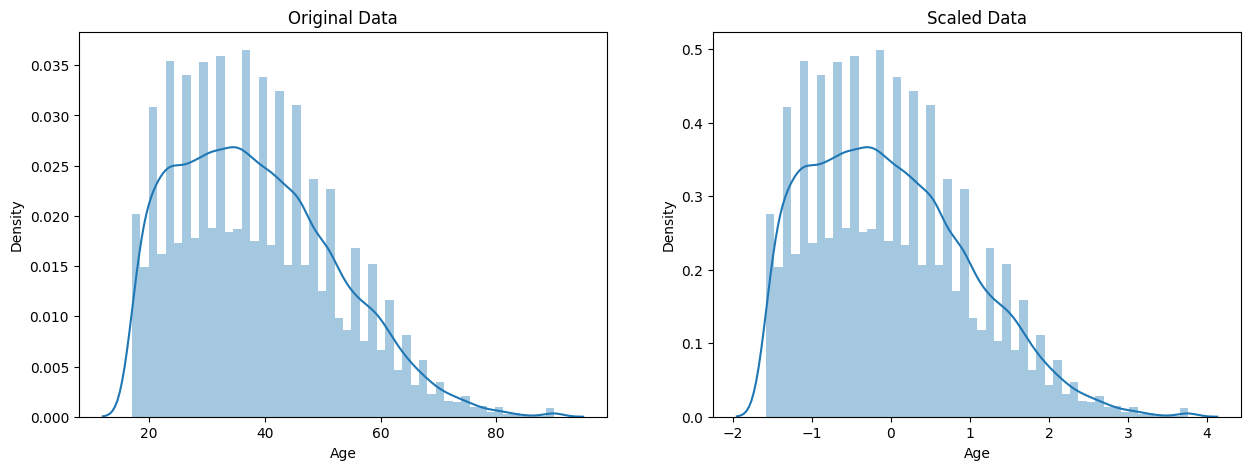

In [30]:
# prompt:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/dd7313e0c6487acd9ed7cd32b786782c7a1d3885/HR_data.csv')

# Select only the numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numeric data
scaler.fit(numeric_data)

# Transform the numeric data
scaled_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Plot the distribution of the original and scaled data
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sb.distplot(numeric_data['Age'])
plt.title('Original Data')

plt.subplot(1, 2, 2)
sb.distplot(scaled_data_df['Age'])
plt.title('Scaled Data')

plt.show()
